# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

**KONTEN**

* [Pendahuluan]
* [Tahap 1. Eksplorasi Data]
    * [1.1 Memuat Data]
    * [1.2 Mengeksplorasi Data Awal]
    * [1.3 Kesimpulan dan Langkah-Langkah Selanjutnya]
* [Tahap 2. Pra-pemrosesan Data]   
    * [2.1 Nilai-Nilai yang Hilang]
    * [2.2 Memperbaiki Tipe Data]
    * [2.3 Memperbaiki Kualitas Data]
    * [2.4 Memeriksa Data yang Sudah Bersih]
    * [2.5 Mempelajari Parameter Inti]
    * [2.6 Mempelajari dan Menangani Outlier]
    * [2.7 Mempelajari Parameter Inti Tanpa Outlier]
    * [2.8 Masa Berlaku Iklan]
    * [2.9 Harga rata-Rata Setiap Jenis Kendaraan]
    * [2.10 Faktor Harga]
* [Tahap 3. Pengujian Hipotesis]
    * [3.1 Pengaruh Jenis dan Usia Kendaraan Terhadap Harga Kendaraan]
    * [3.2 Pengaruh Kondisi dan Jarak Tempuh Terhadap Harga Kendaraan]
* [Kesimpulan Umum]

## Pendahuluan 

Dalam proyek kali ini, kita akan mempelajari dan menemukan faktor-faktor apa saja yang kira-kira dapat mempengaruhi harga sebuah kendaraan. 

### Tujuan: 
Menguji hipotesis:
Usia, jarak tempuh dan kondisi kendaraan mempengaruhi harga jual kendaraan.

### Tahapan
Kumpulan data selama beberapa tahun terakhir disimpan dalam *file* `/datasets/vehicles_us.csv`. 

Pertama, kita akan mengevaluasi kualitas data dan melihat apakah masalahnya signifikan. Kemudian, selama pra-pemrosesan data, kita akan mencoba mengatasi masalah yang muncul pada data tersebut, seperti nilai yang hilang, duplikasi, dan sebagainya.
 
Proyek ini akan terdiri dari tiga tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Pengujian hipotesis

## Pra-pemrosesan

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Memuat Data

In [4]:
df=pd.read_csv('/datasets/vehicles_us.csv')
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [5]:
df.shape

(51525, 13)

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [9]:
df.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Terdapat 13 kolom dan 51525 baris dalam dataset kita.

Namun jika diperhatikan lebih lanjut, terdapat banyak nilai yang hilang pada beberapa kolom, seperti:
   * `model_year`
   * `cylinders`
   * `odometer`
   * `paint_color`
   * `is_4wd`
   
Kolom `is_4wd` memiliki nilai hilang yang paling banyak di antara kolom lainnya.

Selain itu, terdapat beberapa tipe data yang salah untuk beberapa kolom, seperti:
   * kolom `date_posted` masih berupa object.
   * kolom `model_year` juga sedikit aneh karena berupa *float*.
   * kolom `cylinders` dan `is_4wd` sebaiknya berupa *integer*, bukan *float*.

### Kesimpulan dan Langkah-Langkah Selanjutnya

Dataset kita berjumlah 51252 baris dan 13 kolom.

Setiap baris dalam tabel menyimpan data terkait informasi kendaraan yang diiklankan. Sejumlah kolom menyimpan data yang mendeskripsikan harga, waktu iklan kendaraan tersebut diterbitkan, serta berapa lama iklan tersebut ditayangkan. Sisanya menyimpan data terkait informasi kendaraan itu sendiri, seperti: jenis/model, kondisi, dan usia kendaraan.

Meskipun kita memiliki data yang cukup untuk melakukan hipotesis, kita masih memiliki data yang bermasalah, seperti nilai yang hilang, duplikasi, kemungkinan adanya outlier dan tipe data yang tidak sesuai.

Untuk melanjutkan analisis, kita perlu melakukan pra-pemrosesan data terlebih dahulu.

## Mengatasi Nilai-Nilai yang Hilang

In [10]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Kita perlu memperbaiki nilai-nilai yang hilang pada beberapa kolom yang dapat mempengaruhi penelitian kita. Kolom `cylinders`, `paint_color`, dan `is_4wd` mungkin tidak terlalu berpengaruh. Sedangkan, kolom `model_year` dan `odometer` akan mempengaruhi hipotesis karena merupakan salah satu faktor yang diperkirakan akan mempengaruhi harga jual sebuah kendaraan.

Kemungkinan besar kolom-kolom ini berisi nilai yang hilang karena data yang tidak lengkap pada saat di *input*. Beberapa orang mungkin tidak mengetahui informasi yang tepat untuk mengisi kolom `cylinders` dan `odometer`, sehingga bisa terdapat nilai yang hilang.
Sebagian orang juga mungkin tidak mengingat kapan kendaraan tersebut diproduksi, bisa saja mereka membeli kendaraan setelah lewat beberapa tahun dari tahun produksi awal, sehingga nilai-nilai hilang yang muncul di kolom `model_year` dapat dimaklumi.

Untuk memperbaiki nilai-nilai yang hilang tersebut, kita perlu melakukan:

1. Mengisi nilai NaN pada kolom `is_4wd` dengan angka 0 (nol), kemudian mengganti nilai 1 menjadi True dan nilai 0 menjadi False. Kolom ini merupakan kondisi Boolean, sehingga dapat diasumsikan bahwa angka 1 merepresentasikan kendaraan 4WD (nilai True), dan nilai NaN (yang nantinya akan diisi dengan 0) adalah BUKAN kendaraan 4WD (nilai False).
2. Mengisi nilai yang hilang pada kolom `model_year` dan `cylinders` dengan median berdasarkan pengelompokkan dengan `type` (jenis kendaraan).
3. Mengisi nilai yang hilang pada kolom `odometer` dengan median berdasarkan pengelompokkan dengan `condition` (kondisi kendaraan).
4. Mengisi nilai yang hilang pada kolom `paint_color` dengan warna yang paling populer per tahun produksi berdasarkan pengelompokkan dengan `model_year`(tahun produksi).


**Memperbaiki nilai yang Hilang Pada Kolom `is_4wd`**

In [11]:
df['is_4wd'].unique()

array([ 1., nan])

In [12]:
df.loc[df['is_4wd'].isna(), 'is_4wd'] = 0

In [13]:
df['is_4wd'] = df['is_4wd'].replace(1, True)
df['is_4wd'] = df['is_4wd'].replace(0, False)

In [14]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17


**Memperbaiki Nilai yang Hilang Pada Kolom `model_year`**

In [15]:
new_df = df.dropna()

In [16]:
new_df.groupby('type')['model_year'].median().sort_values()

type
convertible    2004.0
offroad        2006.0
other          2009.0
hatchback      2010.0
mini-van       2010.0
wagon          2010.0
SUV            2011.0
bus            2011.0
coupe          2011.0
pickup         2011.0
truck          2011.0
van            2011.0
sedan          2012.0
Name: model_year, dtype: float64

Setelah dilakukan pengelompokkan, kita dapat melihat salah satu masalah pada kolom `model_year` yang diakibatkan oleh kesalahan tipe data. Rasanya tidak mungkin tahun produksi suatu kendaraan bernilai *float*, seperti contoh kendaraan SUV nilai mediannya adalah 2010.5. Namun untuk saat ini, kita dapat mengisi nilai yang hilang terlebih dahulu, baru kemudian kita ubah tipe datanya dari *float* menjadi *integer*

In [17]:
median_my=new_df.groupby('type')['model_year'].median()

In [18]:
def get_median_model_year(row):  
    model_year= row['model_year']
    type = row['type']
    try:
        return median_my[type]
    except:
        return 'error'

In [19]:
df['median_model_year'] = df.apply(get_median_model_year, axis=1)

In [20]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2011.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2011.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2012.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9,2011.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2012.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2012.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2012.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2011.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,2011.0
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2011.0


In [21]:
df['model_year'] = df['model_year'].fillna(df['median_model_year'])

In [22]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2011.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2011.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2012.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9,2011.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2012.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2012.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2012.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2011.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,2011.0
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2011.0


In [23]:
df[df['median_model_year'] == 'error']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year


In [24]:
df['model_year'].shape

(51525,)

**Memperbaiki Nilai yang Hilang Pada Kolom `odometer`**

In [25]:
new_df.groupby('condition')['odometer'].median().sort_values()

condition
new            2600.0
like new      72000.0
excellent    104174.0
good         129000.0
salvage      148000.0
fair         180000.0
Name: odometer, dtype: float64

In [26]:
median_odo=new_df.groupby('condition')['odometer'].median()
median_odo

condition
excellent    104174.0
fair         180000.0
good         129000.0
like new      72000.0
new            2600.0
salvage      148000.0
Name: odometer, dtype: float64

In [27]:
def get_median_odometer(row):  
    odometer= row['odometer']
    condition = row['condition']
    try:
        return median_odo[condition]
    except:
        return 'error'

In [28]:
df['median_odometer'] = df.apply(get_median_odometer, axis=1)

In [29]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year,median_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2011.0,129000.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2011.0,129000.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2012.0,72000.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9,2011.0,180000.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2012.0,104174.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2012.0,104174.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2012.0,104174.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2011.0,104174.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,2011.0,104174.0
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2011.0,104174.0


In [30]:
df['odometer'] = df['odometer'].fillna(df['median_odometer'])

In [31]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year,median_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2011.0,129000.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2011.0,129000.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2012.0,72000.0
3,1500,2003.0,ford f-150,fair,8.0,gas,180000.0,automatic,pickup,NaN,False,2019-03-22,9,2011.0,180000.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2012.0,104174.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2012.0,104174.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2012.0,104174.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2011.0,104174.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,2011.0,104174.0
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2011.0,104174.0


In [32]:
df[df['median_odometer'] == 'error']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year,median_odometer


In [33]:
df['odometer'].shape

(51525,)

**Memperbaiki Nilai yang Hilang Pada Kolom `cylinders`**

In [34]:
new_df.groupby('type')['cylinders'].median().sort_values()

type
hatchback       4.0
sedan           4.0
wagon           4.0
SUV             6.0
coupe           6.0
mini-van        6.0
offroad         6.0
other           6.0
van             6.0
convertible     8.0
pickup          8.0
truck           8.0
bus            10.0
Name: cylinders, dtype: float64

In [35]:
median_cy = new_df.groupby('type')['cylinders'].median()

In [36]:
def get_median_cylinders(row):  
    cylinders= row['cylinders']
    type = row['type']
    try:
        return median_cy[type]
    except:
        return 'error'

In [37]:
df['median_cylinders'] = df.apply(get_median_cylinders, axis=1)

In [38]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year,median_odometer,median_cylinders
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2011.0,129000.0,6.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2011.0,129000.0,8.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2012.0,72000.0,4.0
3,1500,2003.0,ford f-150,fair,8.0,gas,180000.0,automatic,pickup,NaN,False,2019-03-22,9,2011.0,180000.0,8.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2012.0,104174.0,4.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2012.0,104174.0,4.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2012.0,104174.0,4.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2011.0,104174.0,6.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,2011.0,104174.0,6.0
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2011.0,104174.0,6.0


In [39]:
df['cylinders'] = df['cylinders'].fillna(df['median_cylinders'])

In [40]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year,median_odometer,median_cylinders
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2011.0,129000.0,6.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2011.0,129000.0,8.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2012.0,72000.0,4.0
3,1500,2003.0,ford f-150,fair,8.0,gas,180000.0,automatic,pickup,NaN,False,2019-03-22,9,2011.0,180000.0,8.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2012.0,104174.0,4.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2012.0,104174.0,4.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2012.0,104174.0,4.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2011.0,104174.0,6.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,2011.0,104174.0,6.0
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2011.0,104174.0,6.0


In [41]:
df[df['median_cylinders'] == 'error']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year,median_odometer,median_cylinders


In [42]:
df['cylinders'].shape

(51525,)

**Memperbaiki Nilai yang Hilang Pada Kolom `paint_color`**

Kolom `paint_color` merupakan jenis kolom kategorikal, sehingga kita tidak bisa mengisi dengan nilai median. Kolom ini memang tidak akan terlalu berpengaruh terhadap hipotesis kita, tapi kita juga tidak bisa mengganti nilai yang hilang tersebut secara asal dengan warna-warna yang ada. Kita asumsikan banyaknya nilai yang hilang pada kolom `paint_color` adalah karena banyak orang tidak memasukkan datanya atau mungkin terlewat ketika peng*input*an data. Untuk opsi yang lebih aman, kita bisa menggantinya dengan *unknown*. 


In [43]:
df['paint_color']=df['paint_color'].fillna('unknown')

In [44]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_model_year,median_odometer,median_cylinders
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2011.0,129000.0,6.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2011.0,129000.0,8.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2012.0,72000.0,4.0
3,1500,2003.0,ford f-150,fair,8.0,gas,180000.0,automatic,pickup,unknown,False,2019-03-22,9,2011.0,180000.0,8.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2012.0,104174.0,4.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2012.0,104174.0,4.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2012.0,104174.0,4.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2011.0,104174.0,6.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,2011.0,104174.0,6.0
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2011.0,104174.0,6.0


In [45]:
df['paint_color'].shape

(51525,)

In [46]:
df.isna().sum()

price                0
model_year           0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
transmission         0
type                 0
paint_color          0
is_4wd               0
date_posted          0
days_listed          0
median_model_year    0
median_odometer      0
median_cylinders     0
dtype: int64

**Mengatasi duplikat**

In [47]:
df.duplicated().sum()

0

In [48]:
df.drop(['median_model_year', 'median_odometer', 'median_cylinders'], axis=1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


**Kesimpulan Sementara**

Kita telah menemukan beberapa masalah pada data kita dan beberapa telah diperbaiki, maka dapat diambil kesimpulan sementara, yaitu:

   * Terdapat nilai yang hilang pada kolom `odometer`dan telah diisi dengan median berdasarkan pengelompokkan dengan `condition` (kondisi kendaraan).
   
   * Terdapat nilai yang hilang pada kolom `cylinders` telah diisi dengan median berdasarkan pengelompokkan dengan `type` (jenis kendaraan). Namun kita masih perlu memperbaiki tipe datanya dari *float* menjadi *integer*.
   
   * Terdapat nilai NaN pada kolom `is_4wd` dan nilai tersebut sudah diperbaiki dengan diisi menjadi angka 0 (nol), dan kemudian dilakukan penggantian nilai 1 menjadi True, dan 0 menjadi False. Sehingga kondisi Boolean pada kolom `is_4wd` menjadi: False untuk kendaraan non 4WD dan True untuk kendaraan 4WD. Kita juga masih perlu memperbaiki tipe datanya, dari *float* menjadi *integer*.
   
   * Terdapat nilai yang hilang pada kolom `model_year` dan sudah kita isi dengan median berdasarkan pengelompokkan dengan kolom `type`. Namun kita masih perlu memperbaiki tipe datanya dari *float* menjadi *integer*.
   
   * Terdapat nilai yang hilang pada kolom `paint_color` dan sudah kita isi dengan *unknown*.
   
   * Tidak terdapat data terduplikasi.
   
Sekarang data kita sudah tidak memiliki duplikat dan sudah tidak terdapat nilai yang hilang. Selanjutnya, kita akan memperbaiki tipe data pada kolom yang bermasalah.

## Memperbaiki Tipe Data

Seperti yang sudah dijelaskan di awal penelitian, kita memiliki masalah dengan tipe data pada beberapa kolom dataset. Kolom bermasalah tersebut adalah:
   * kolom `date_posted` masih berupa object, dimana seharusnya tipe datanya adalah datetime.
   * kolom `model_year` juga sedikit aneh karena berupa float. Tidak mungkin ada tahun bernilai *float* (contohnya 2010.5), jadi seharusnya ia berupa integer.
   * kolom `cylinders` dan `is_4wd` sebenarnya tidak perlu berupa integer, namun data kita akan lebih mudah dibaca jika kita melihatnya dengan tipe data integer. Contohnya untuk kolom `is_4wd` yang merupakan kondisi Boolean, lebih mudah dibaca jika berupa integer, dibandingkan jika berupa *float*.
   
Untuk itu kita akan mengubah tipe data yang bermasalah tersebut.

In [50]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')

In [51]:
df['model_year'] = df['model_year'].astype('int')

In [52]:
df['cylinders'] = df['cylinders'].astype('int')

In [53]:
df['is_4wd'] = df['is_4wd'].astype('int')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


Sekarang, data kita sudah memiliki tipe data yang benar.

   * tipe data kolom `date_posted` sudah berupa datetime.
   * kolom `model_year` tipe datanya sudah berupa integer.
   * kolom `cylinders` dan `is_4wd` tipe datanya sudah berupa integer.

## Memperbaiki Kualitas Data

Untuk mempermudah analisis data, kita dapat menambahkan beberapa faktor ke dalam tabel dataset kita.

- Menambahkan hari dalam minggu, bulan dan tahun iklan ditayangkan.
- Menambahkan usia kendaraan saat iklan ditayangkan.
- Menambahkan jarak tempuh rata-rata kendaraan per tahun.
- Mengganti nilai pada kolom `condition`dengan skala numerik. 

**Menambahkan Hari**

In [55]:
df['weekday'] = df['date_posted'].dt.weekday
df['month'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year

In [56]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019


**Menambahkan Usia Kendaraan**

In [57]:
df['vehicle_age'] = (df['year_posted'] - df['model_year'])

In [58]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted,vehicle_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11


**Menambahkan Jarak Tempuh Rata-rata Kendaraan per Tahun**

In [59]:
df['average_mileage'] = df['odometer'] / df['vehicle_age']

In [60]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11250.000000
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.500000
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404.000000
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.500000
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.333333
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.000000


In [61]:
df['average_mileage'] = round(df['average_mileage'], 1)

Untuk menghitung rata-rata jarak tempuh, kita perlu membagi nilai odometer dengan usia kendaraan. Karena itu, kita perlu memastikan tidak ada usia kendaraan bernilai 0 (nol), karena akan menyebabkan *error* (kita tidak bisa membagi bilangan dengan 0).

In [62]:
df[df['vehicle_age'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted,vehicle_age,average_mileage
19,13990,2018,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,0,2018-08-25,27,5,8,2018,0,inf
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,unknown,1,2018-10-13,36,5,10,2018,0,inf
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,1,2019-02-28,30,3,2,2019,0,inf
99,39950,2018,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,unknown,1,2018-08-05,16,6,8,2018,0,inf
106,21500,2019,nissan frontier crew cab sv,good,6,gas,16168.0,other,pickup,white,0,2019-03-29,70,4,3,2019,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018,ram 1500,excellent,8,gas,9446.0,automatic,truck,unknown,1,2018-05-06,39,6,5,2018,0,inf
51442,28990,2018,ford f150,excellent,8,gas,10152.0,automatic,truck,white,1,2018-06-13,47,2,6,2018,0,inf
51446,15999,2018,chevrolet malibu,excellent,4,gas,50502.0,automatic,sedan,black,0,2018-07-28,8,5,7,2018,0,inf
51447,33990,2019,ram 1500,excellent,8,gas,9000.0,automatic,truck,white,1,2019-01-25,36,4,1,2019,0,inf


Ternyata terdapat 2128 data yang usia kendaraannya 0 (nol). Mungkin usia kendaraannya baru beberapa bulan saja dan langsung dijual. Kita dapat mengganti kondisi ini supaya usia kendaraan tidak bernilai 0. 
Kita asumsikan untuk usia kendaraan 0 ini sama dengan 1.

In [63]:
df['vehicle_age'] = df.apply(lambda x: x['vehicle_age']+1 if x['vehicle_age']==0 else x['vehicle_age'], axis=1)


In [64]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.3
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.1
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.3
3,1500,2003,ford f-150,fair,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11250.0
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.5
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.5
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404.0
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.5
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.0


In [65]:
df[df['vehicle_age'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted,vehicle_age,average_mileage


**Mengganti Nilai Kolom `condition` Menjadi Skala Numerik**

Untuk mengganti nilai pada kolom `condition` menjadi skala numerik, kita perlu membuat *dictionary* supaya dapat dimanipulasi lebih mudah. Nilai string akan digunakan sebagai **key** dan angka(numerik) akan digunakan sebagai **value**.

In [66]:
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [67]:
condition_dict = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}

In [68]:
df['condition'] = df['condition'].replace(condition_dict)

In [69]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.3
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.1
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.3
3,1500,2003,ford f-150,1,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11250.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.5
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.5
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404.0
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.5
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.3
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.0


Kita telah memperbaiki kualitas data dan menambahkan faktor-faktor yang akan mempermudah analisa data.

- Hari iklan ditayangkan telah ditambahkan pada kolom `weekday`.
- Usia kendaraan sudah ditambahkan pada kolom `vehicle_age`.
- Jarak tempuh rata-rata kendaraan per tahun sudah ditambahkan pada kolom `average_mileage`.
- Nilai string pada kolom `condition`sudah diganti dengan skala numerik. 

Selanjutnya, kita perlu memeriksa sekali lagi apakah data kita sudah siap untuk dianalisis.

## Memeriksa Data yang Sudah Bersih

Setelah melakukan pra-pemrosesan data dengan mengatasi nilai yang hilang dan memperbaiki tipe serta kualitas data kita, saat ini data kita sudah siap untuk dianalisis.

Kita akan mencoba melihat sekali lagi data yang kita punya.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  int64         
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  int64         
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  weekday          51525 non-null  int64         
 14  month            51525 non-null  int64

In [77]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.3
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.1
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.3
3,1500,2003,ford f-150,1,8,gas,180000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11250.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.5
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.5
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404.0
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.5
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.3
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.0


Data kita sudah tidak memiliki nilai yang hilang, semua kolom mempunyai jumlah 51525 baris. Kolom yang kita punya bertambah dari 13 kolom menjadi 18 kolom, karena kita telah menambahkan 5 kolom baru, yaitu: `weekday`, `month`, `year_posted`, `vehicle_age`, dan `average_mileage`. Tipe data untuk semua kolom sudah sesuai.

Data kita sudah siap untuk dianalisis.

## Mempelajari Parameter Inti 

Setelah tahap pra-pemrosesan data selesai, kita siap untuk mulai menganalisis data yang kita miliki.

Pertama, kita akan mempelajari beberapa parameter seperti yang tercantum di bawah ini, untuk melihat apakah ada *outlier* yang mempengaruhi data kita atau tidak.
Parameter tersebut adalah:
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

Disini kita akan membuat diagram histogram berdasarkan parameter di atas, untuk lebih memahami data yang kita miliki.

In [78]:
pars = ['price', 'vehicle_age', 'odometer']

def plot_histograms(df, pars):
    fig, axs = plt.subplots(1, len(pars), figsize=(25,5))
    for i, j in enumerate(pars):
        axs[i].hist(df[j], bins=100)
        axs[i].set_title(j)
        axs[i].grid(True)
    plt.show()

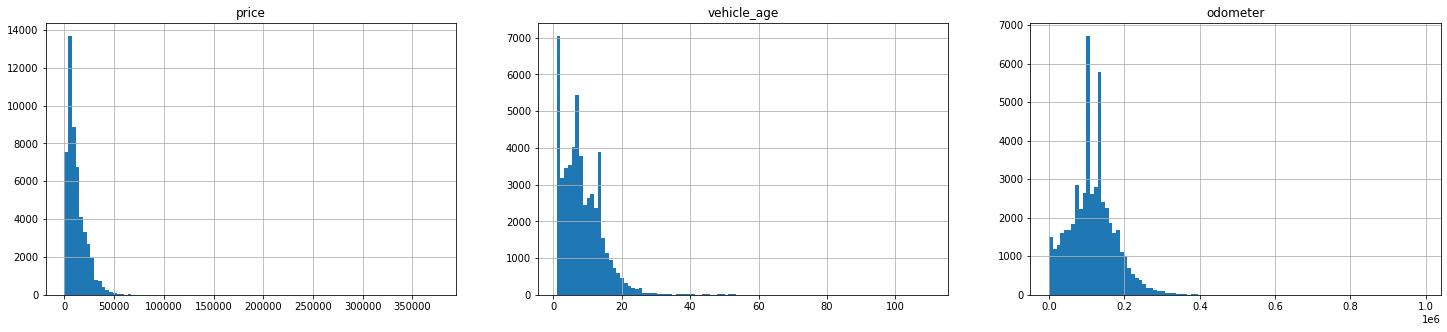

In [79]:
plot_histograms(df, pars)

In [80]:
df['cylinders'].unique()

array([ 6,  4,  8,  5, 10,  3, 12])

<AxesSubplot:>

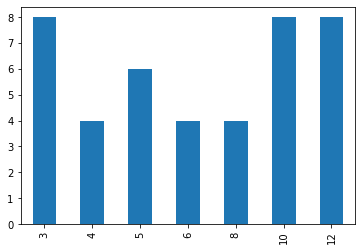

In [81]:
df['cylinders'].reindex([3,4,5,6,8,10,12]).plot(kind='bar')

In [82]:
df['condition'].unique()

array([2, 4, 1, 3, 0, 5])

<AxesSubplot:>

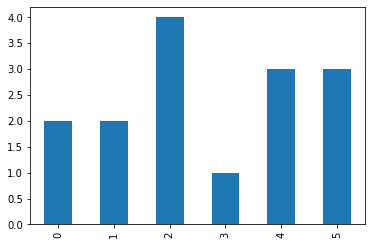

In [83]:
df['condition'].reindex([0,1,2,3,4,5]).plot(kind='bar')



Setelah melihat hasil diagram di atas, ternyata beberapa kolom sepertinya memiliki *outlier*.

Masing-masing kolom `price`, `vehicle_age`, dan `odometer` cenderung memiliki lonjakan tajam di sisi kiri dan nilainya mendekati nol, padahal nilai maksimumnya di sisi kanan sangat panjang, yang berarti, kita seharusnya memiliki data di kisaran nilai tersebut. Berdasarkan histogram ini, kita dapat menyimpulkan bahwa kemungkinan besar ketiga kolom tersebut memiliki outlier.

Untuk kolom `cylinders` dan `condition`, sebenarnya kedua kolom ini merupakan data kategorikal, meskipun mereka mengandung unsur angka(numerik), maka kita buat grafiknya menggunakan diagram batang. Penggunaan diagram batang biasanya lebih tepat digunakan untuk menyajikan data yang variabelnya dalam kategori-kategori tertentu.

Jika dilihat dari diagram di atas, tidak ada masalah dengan kolom `cylinders` dan `condition`, sehingga dapat diasumsikan tidak terdapat *outlier*.

## Mempelajari dan Menangani Outlier


Seperti yang sudah kita lihat pada histogram di atas, kolom `price`, `vehicle_age`, dan `odometer` masing-masing kemungkinan memiliki *outlier*. 

Untuk saat ini, kita asumsikan nilai-nilai yang besar adalah *outlier*, sehingga kita akan fokus menggunakan data dengan nilai yang lebih masuk akal. Kita akan menggunakan rentang argumen dan menentukan batas bawah serta batas atas *outlier* dan menyimpan data tanpa *outlier* dalam dataset baru.

In [86]:
cols = ['price', 'vehicle_age', 'odometer']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
upper_bound

price         -12758.5
vehicle_age       -8.0
odometer      -32708.5
dtype: float64


price           34597.5
vehicle_age        24.0
odometer       256295.5
dtype: float64

Kita telah menentukan batas bawah *outlier* untuk masing-masing kolom, yaitu:

- batas bawah kolom `price` adalah -12758.5
- batas bawah kolom `vehicle_age` adalah -8
- batas bawah kolom `odometer` adalah -32708.5

Kita telah menentukan batas atas *outlier* untuk masing-masing kolom, yaitu:

- batas atas kolom `price` adalah 34597.5
- batas atas kolom `vehicle_age` adalah 24
- batas atas kolom `odometer` adalah 256295.5

Selanjutnya kita bisa menggunakan grafik boxplot, untuk melihat adanya *outlier*. Dengan grafik boxplot, keberadaan *outlier* dapat lebih terlihat dibandingkan dengan histogram.

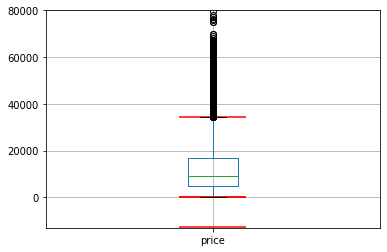

In [87]:
#Kolom price

plt.ylim(-13000, 80000)
df.boxplot('price')
plt.hlines(y=[lower_bound, upper_bound], xmin=0.9, xmax=1.1, color='red') 

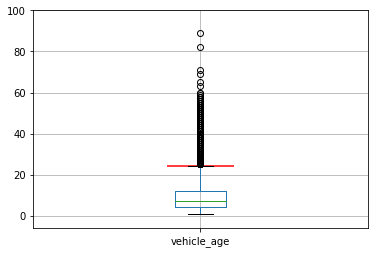

In [88]:
#Kolom vehicle_age

plt.ylim(-6, 100)
df.boxplot('vehicle_age')
plt.hlines(y=[lower_bound, upper_bound], xmin=0.9, xmax=1.1, color='red') 

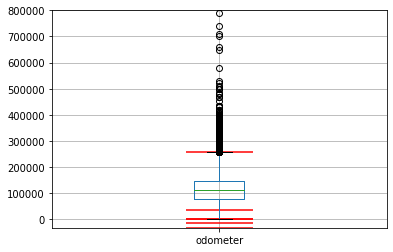

In [89]:
#Kolom odometer

plt.ylim(-33000, 800000)
df.boxplot('odometer')
plt.hlines(y=[lower_bound, upper_bound], xmin=0.9, xmax=1.1, color='red') 

<AxesSubplot:>

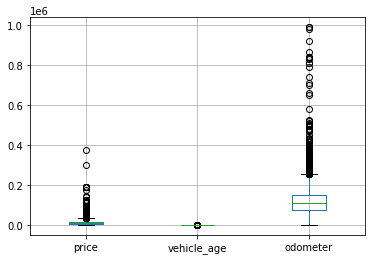

In [90]:
df[cols].boxplot()

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'vehicle_age'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

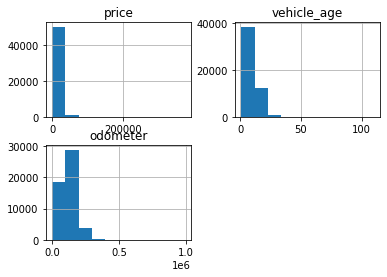

In [91]:
df[cols].hist()

In [92]:
df[cols].describe()

,price,vehicle_age,odometer
count,51525.000000,51525.000000,51525.000000
mean,12132.464920,8.504784,115173.453586
std,10040.803015,6.030851,60491.667278
min,1.000000,1.000000,0.000000
25%,5000.000000,4.000000,75668.000000
50%,9000.000000,7.000000,110908.000000
75%,16839.000000,12.000000,147919.000000
max,375000.000000,110.000000,990000.000000


Ternyata, ketiga kolom pada dataset kita memiliki nilai batas bawah yang jauh di bawah nilai minimum 0 (nol). Setelah membandingkan boxplot serta distribusi per kolom, sepertinya kolom `price` sedikit bermasalah dibandingkan dengan 2 kolom lainnya. Meskipun kolom `odometer` dan `vehicle_age` juga memiliki *outlier*, namun kolom `price` nilai rata-ratanya dua kali lipat dari mediannya, sehingga kemungkinan besar kolom ini yang memiliki paling banyak *outlier*.

In [93]:
df_no_outlier = df.loc[(df['price'] >= lower_bound['price']) & (df['price'] <= upper_bound['price']) &
                      (df['vehicle_age']>= lower_bound['vehicle_age']) & (df['vehicle_age'] <= upper_bound['vehicle_age']) &
                      (df['odometer'] >= lower_bound['odometer']) & (df['odometer'] <= upper_bound['odometer'])]

In [94]:
df_no_outlier.shape

(48289, 18)

## Mempelajari Parameter Inti Tanpa Outlier

Sekarang kita telah memiliki data yang tidak berisi *outlier* dalam DataFrame terpisah. Kita akan coba membuat grafik yang baru dari DataFrame tanpa *outlier* tersebut dan membandingkannya dengan data sebelumnya (yang berisi *outlier*).

In [97]:
cols = ['price', 'vehicle_age', 'odometer']

Q1 = df_no_outlier[cols].quantile(0.25)
Q3 = df_no_outlier[cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound_no = Q1 - 1.5 * IQR
upper_bound_no = Q3 + 1.5 * IQR

print(lower_bound)
upper_bound

price         -12758.5
vehicle_age       -8.0
odometer      -32708.5
dtype: float64


price           34597.5
vehicle_age        24.0
odometer       256295.5
dtype: float64

<AxesSubplot:>

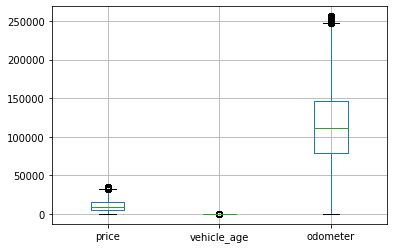

In [98]:
df_no_outlier[cols].boxplot()

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'vehicle_age'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

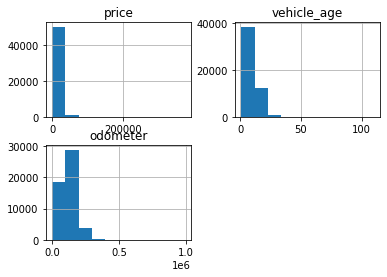

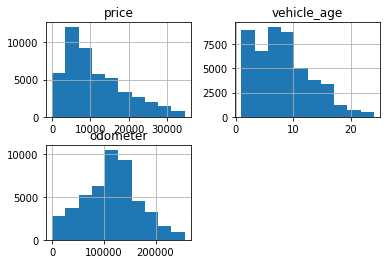

In [99]:
df[cols].hist()
df_no_outlier[cols].hist()

In [100]:
df_no_outlier[cols].describe()

,price,vehicle_age,odometer
count,48289.000000,48289.000000,48289.000000
mean,11237.023277,8.205513,113682.322309
std,7828.333075,4.961195,53147.200182
min,1.000000,1.000000,0.000000
25%,5000.000000,4.000000,78671.000000
50%,8995.000000,7.000000,111946.000000
75%,15990.000000,11.000000,146100.000000
max,34595.000000,24.000000,256124.000000


Setelah membuat grafik boxplot yang baru dari DataFrame baru tanpa *outlier*, ternyata kita masih melihat adanya *outlier*, terutama untuk kolom `price` dan kolom `odometer`, meskipun persebaran datanya sudah tampak lebih merata dibandingkan DataFrame awal. Artinya, memang ada kondisi-kondisi yang luar biasa yang kita miliki dalam data kita.

**Kesimpulan Sementara**

Kita telah mencoba membuat grafik boxplot untuk masing-masing DataFrame, baik yang asli(dengan *outlier*) maupun yang baru (tanpa *outlier*). Setelah membandingkan keduanya, dapat ditarik kesimpulan:

- Grafik kolom `price` tidak ada perubahan secara signifikan. Ia masih memiliki *outlier* meskipun kita telah mem*filter* data kita menjadi tanpa *outlier*. Mungkin saja ada kendaraan tipe tertentu yang merupakan mobil langka yang jumlahnya terbatas di pasaran, sehingga harganya sangat tinggi.
- Grafik kolom `vehicle_age` terlihat lebih baik pada DataFrame baru (tanpa *outlier*) dibandingkan DataFrame asli. Pada DataFrame yang baru, kolom ini sudah tidak memiliki *outlier*.
- Grafik kolom `odometer` hampir sama seperti kolom `price`. Tidak banyak perubahan signifikan, dan masih memiliki *outlier*. Mungkin terdapat kendaraan yang pemakaiannya berlebihan atau sangat sering digunakan, sehingga jarak tempuhnya sangat banyak.


## Masa Berlaku Iklan 

Kita sudah mencoba melakukan filter pada data kita dan membandingkan hasilnya dengan dataset awal. Selanjutnya, mari kita lihat masa berlaku iklan dan mempelajari berapa lama iklan ditayangkan.

In [101]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

<AxesSubplot:>

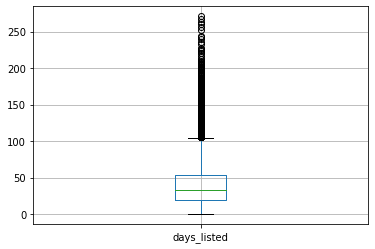

In [102]:
df.boxplot('days_listed')

Masa berlaku iklan secara rata-rata memiliki waktu 39-40 hari. Namun, sepertinya angka ini tidak begitu akurat, melihat banyaknya *outlier* pada grafik boxplot yang kita miliki dapat mempengaruhi nilai rata-rata. Mungkin kita bisa menggunakan mediannya sebagai acuan.

- Melihat dari mediannya, maka secara umum, iklan ditayangkan dalam waktu 33 hari.
- Jika iklan ditayangkan kurang dari 19 hari (nilai dari kuartil pertama), maka dapat diasumsikan bahwa iklan tersebut dihapus dengan cepat.
- Sedangkan jika iklan ditayangkan lebih dari 53 hari (nilai dari kuartil ketiga), maka diasumsikan bahwa iklan tersebut ditayangkan dengan waktu yang sangat lama.

## Harga Rata-Rata Setiap Jenis Kendaraan

Sekarang kita akan mempelajari ketergantungan antara jumlah iklan pada jenis kendaraan tertentu. Untuk itu, kita perlu mengelompokkan tiap jenis kendaraan dan menghitung jumlah iklan berdasarkan kelompok type kendaraan tersebut.

In [103]:
df_no_outlier['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'hatchback', 'van',
       'wagon', 'mini-van', 'convertible', 'other', 'offroad', 'bus'],
      dtype=object)

In [104]:
df_grouped = df_no_outlier.groupby(['type']).agg({"model":"count"})\
            .reset_index().rename(columns = {"model": "total_ads"}).sort_values(by = 'total_ads', ascending=False)
df_grouped

,type,total_ads
9,sedan,12009
0,SUV,11885
10,truck,11071
8,pickup,6273
3,coupe,2029
12,wagon,1500
5,mini-van,1141
4,hatchback,1006
11,van,578
2,convertible,354


<AxesSubplot:xlabel='type'>

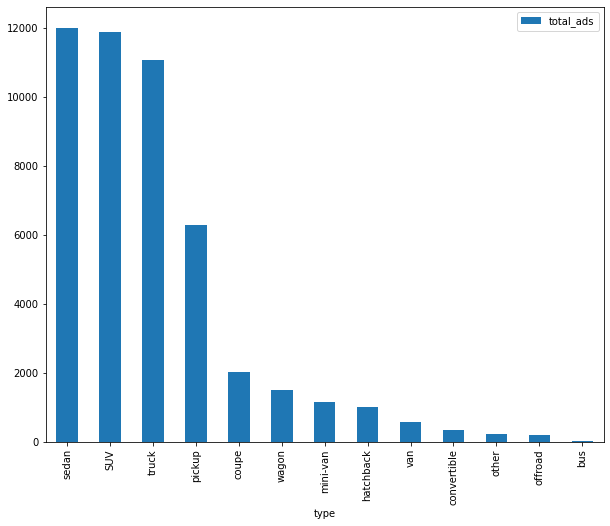

In [105]:
df_grouped.plot(x= 'type', kind= 'bar', figsize = (10, 8))

Setelah melihat grafik diatas, ternyata 2 jenis kendaraan dengan jumlah iklan paling banyak adalah **sedan** dengan jumlah total iklan 12009 dan **SUV** dengan jumlah total iklan 11885.

## Pengujian Hipotesis

## Faktor Harga

Pada tahap sebelumnya, kita telah menemukan 2 jenis kendaraan yang memiliki jumlah iklan paling banyak, yaitu sedan dan SUV. Kedua jenis kendaraan ini dapat kita asumsikan merupakan jenis kendaraan populer karena iklannya paling banyak.

Untuk tahap selanjutnya, kita akan mempelajari korelasi antara harga kendaraan dengan variabel lainnya seperti usia, jarak tempuh, kondisi, tipe transmisi, dan warna. Sehingga pada akhirnya kita dapat menyimpulkan faktor apakah yang paling mempengaruhi harga kendaraan.

Karena jenis transmisi dan warna merupakan variabel kategorik, kita akan membuatnya dengan menggunakan grafik *boxplot*, sedangkan sisanya akan dibuat dengan menggunakan *scatterplot*. Selain itu, supaya parameternya tetap valid untuk digunakan saat analisis, kita akan menggunakan variabel kategorik yang memiliki setidaknya 50 iklan.

**Faktor Harga untuk Kendaraan Jenis Sedan**

In [106]:
df_sedan = df_no_outlier[df_no_outlier['type'] == 'sedan']
df_sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted,vehicle_age,average_mileage
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.3
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.5
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.5
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404.0
11,8990,2012,honda accord,3,4,gas,111142.0,automatic,sedan,grey,0,2019-03-28,29,3,3,2019,7,15877.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627.2
51521,2700,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2,11,2018,16,11343.8
51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222.2
51523,7455,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,7,2018,5,27914.6


In [107]:
df_sedan['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [108]:
df_sedan['transmission'].value_counts()

automatic    11302
manual         575
other          132
Name: transmission, dtype: int64

In [109]:
#df_sedan_transmission = df_sedan.groupby('transmission').agg({'model': 'count', 'price': 'median'})\
                                #.rename(columns = ({'model': 'ads', 'price' : 'median_price'}))\
                                #.sort_values(by = 'median_price', ascending = False)\
                                #.query('ads > 50')
#df_sedan_transmission

In [110]:
df_sedan['paint_color'].value_counts()

unknown    2161
silver     2032
black      1757
grey       1610
white      1490
blue       1220
red         934
custom      296
brown       254
green       202
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

In [111]:
df_sedan_color_boxplot = df_sedan.loc[~df_sedan['paint_color'].isin(['purple', 'yellow', 'orange'])]
df_sedan_color_boxplot['paint_color'].value_counts()

unknown    2161
silver     2032
black      1757
grey       1610
white      1490
blue       1220
red         934
custom      296
brown       254
green       202
Name: paint_color, dtype: int64

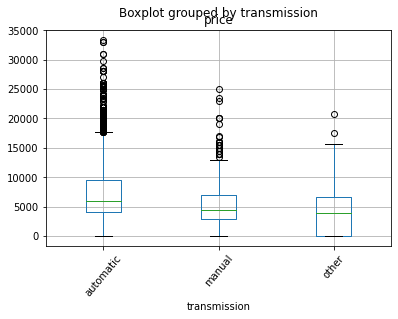

In [112]:
df_sedan.boxplot('price', by = 'transmission')
plt.xticks(rotation = 50)
plt.show()

Dari grafik *boxplot* antara transmisi dan harga, ternyata kendaraan dengan transmisi otomatis harganya lebih tinggi dibandingkan transmisi manual dan lainnya.Terlihat median untuk transmisi otomatis berada diatas jenis transmisi manual dan lainnya. Tipe transmisi ini kemungkinan sedikit mempengaruhi harga.

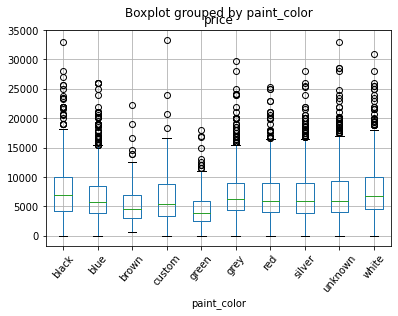

In [113]:
df_sedan_color_boxplot.boxplot('price', by = 'paint_color')
plt.xticks(rotation = 50)
plt.show()

Dari grafik *boxplot* antara warna dan harga, sepertinya warna kendaraan populer seperti hitam dan putih memiliki harga yang lebih tinggi dibandingkan warna-warna lainnya, meskipun perbedaannya nampak tidak terlalu signifikan. Kecuali untuk warna hijau, dimana kendaraan dengan warna hijau terlihat memiliki harga yang paling rendah diantara warna-warna lainnya.

Text(0.5, 1.0, 'vehicle_age')

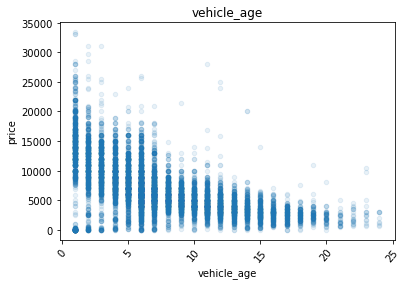

In [114]:
#Scatterplot untuk data numerik : vehicle_age

df_sedan.plot(x = 'vehicle_age', y = 'price', kind = 'scatter', alpha = 0.1, ax= plt.subplot(1,1,1))
plt.xticks(rotation = 50)
plt.title('vehicle_age')

Usia kendaraan rupanya mempengaruhi harga, dimana usia kendaraan yang semakin tua membuat harga semakin menurun.

Text(0.5, 1.0, 'odometer')

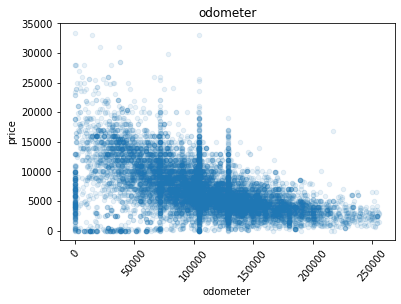

In [115]:
#Scatterplot untuk data numerik : odometer

df_sedan.plot(x = 'odometer', y = 'price', kind = 'scatter', alpha = 0.1, ax= plt.subplot(1,1,1))
plt.xticks(rotation = 50)
plt.title('odometer')

Jarak tempuh sepertinya mempengaruhi harga jenis kendaraan sedan. Dapat kita lihat pada grafik *scatterplot* diatas menunjukkan semakin tinggi jarak tempuhnya, harganya pun semakin menurun. Meskipun ada juga keadaan dimana jarak tempuh tinggi, namun harganya pun tinggi. 

Text(0.5, 1.0, 'condition')

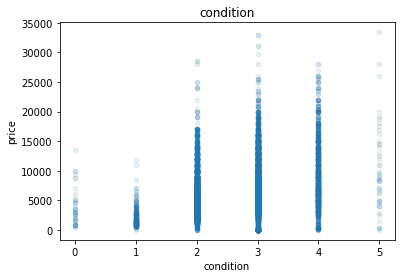

In [116]:
#Scatterplot untuk data numerik : condition

df_sedan.plot(x = 'condition', y = 'price', kind = 'scatter', alpha = 0.1, ax= plt.subplot(1,1,1))
plt.title('condition')

Kondisi kendaraan tidak selalu mempengaruhi harga sebuah sedan. Nampaknya kita tidak perlu kendaraan dengan kondisi baru. Selama kondisi kendaraan tersebut masih baik dan layak pakai serta terlihat baru, mereka dapat dijual dengan harga yang cukup tinggi. Bahkan kendaraan dengan kondisi yang sangat parah pun masih memiliki nilai yang cukup tinggi.

**Korelasi untuk Kendaraan Jenis Sedan**

In [117]:
df_sedan['price'].corr(df_sedan['vehicle_age'])

-0.6107965841831157

In [118]:
df_sedan['price'].corr(df_sedan['odometer'])

-0.5191533122664357

In [119]:
df_sedan['price'].corr(df_sedan['condition'])

0.2920774876690869

Setelah melihat korelasi antara harga kendaraan jenis sedan dengan usia, jarak tempuh dan kondisinya, kita dapat menarik kesimpulan:
- usia dan jarak tempuh memiliki ketergantungan yang cukup kuat dengan harga, namun cenderung menunjukkan korelasi negatif. Semakin tinggi usia dan jarak tempuh, harganya semakin turun.
- kondisi kendaraan memiliki koneksi yang lemah, sehingga dapat dikatakan ia tidak mempengaruhi harga kendaraan.

**Faktor Harga untuk Kendaraan Jenis SUV**

In [120]:
df_suv = df_no_outlier[df_no_outlier['type'] == 'SUV']
df_suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.3
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.5
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.3
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.0
14,12990,2009,gmc yukon,3,8,gas,132285.0,automatic,SUV,black,1,2019-01-31,24,3,1,2019,10,13228.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,2,6,gas,144500.0,automatic,SUV,unknown,1,2019-03-05,1,1,3,2019,7,20642.9
51496,4999,2002,toyota 4runner,3,6,gas,177901.0,automatic,SUV,unknown,1,2018-05-26,59,5,5,2018,16,11118.8
51500,6995,2012,buick enclave,3,6,gas,157000.0,automatic,SUV,white,1,2018-08-04,17,5,8,2018,6,26166.7
51502,7995,2011,chevrolet equinox,4,4,gas,111088.0,automatic,SUV,unknown,0,2019-04-01,175,0,4,2019,8,13886.0


In [121]:
df_suv['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [122]:
df_suv['transmission'].value_counts()

automatic    11267
manual         460
other          158
Name: transmission, dtype: int64

In [123]:
df_suv['paint_color'].value_counts()

unknown    2141
black      2090
white      1869
silver     1530
grey       1146
blue       1011
red         872
green       413
brown       351
custom      298
orange       81
yellow       45
purple       38
Name: paint_color, dtype: int64

In [124]:
df_suv_color_boxplot = df_suv.loc[~df_suv['paint_color'].isin(['purple', 'yellow'])]
df_suv_color_boxplot['paint_color'].value_counts()

unknown    2141
black      2090
white      1869
silver     1530
grey       1146
blue       1011
red         872
green       413
brown       351
custom      298
orange       81
Name: paint_color, dtype: int64

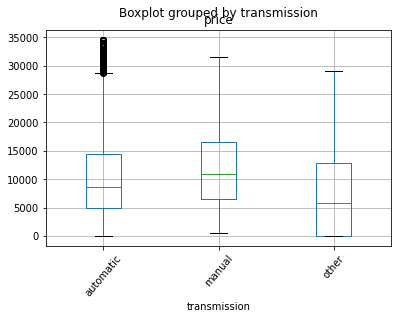

In [125]:
df_suv.boxplot('price', by = 'transmission')
plt.xticks(rotation = 50)
plt.show()

Tampaknya kendaraan SUV dengan transmisi manual memiliki harga yang paling tinggi diantara tipe transmisi lain. 

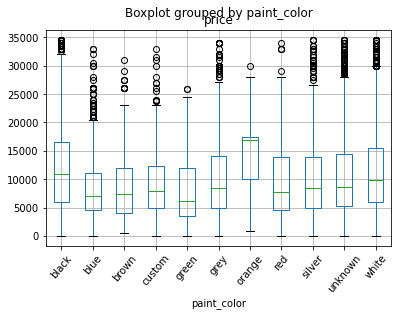

In [126]:
df_suv_color_boxplot.boxplot('price', by = 'paint_color')
plt.xticks(rotation = 50)
plt.show()

Dilihat dari grafik *boxplot* diatas, sepertinya ada keunikan. Dimana median harga kendaraan SUV berwarna *orange* adalah yang paling tinggi, bahkan jauh lebih tinggi dibandingkan warna-warna favorit seperti *black* dan *white*. Sepertinya warna tidak memiliki pengaruh signifikan terhadap harga.

Text(0.5, 1.0, 'vehicle_age')

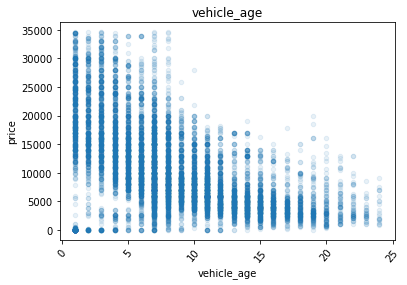

In [127]:
#Scatterplot untuk data numerik : vehicle_age

df_suv.plot(x = 'vehicle_age', y = 'price', kind = 'scatter', alpha = 0.1, ax= plt.subplot(1,1,1))
plt.xticks(rotation = 50)
plt.title('vehicle_age')

Umur kendaraan jenis SUV ternyata mempengaruhi harga jualnya. Semakin tua usia kendaraannya, harganya terlihat semakin menurun.

Text(0.5, 1.0, 'odometer')

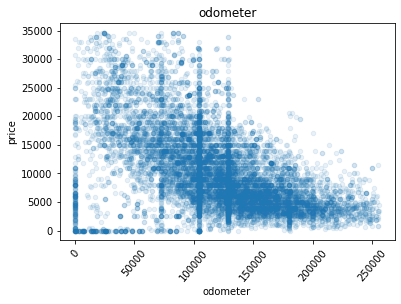

In [128]:
#Scatterplot untuk data numerik : odometer

df_suv.plot(x = 'odometer', y = 'price', kind = 'scatter', alpha = 0.1, ax= plt.subplot(1,1,1))
plt.xticks(rotation = 50)
plt.title('odometer')

Jarak tempuh sepertinya mempengaruhi harga jenis kendaraan SUV. Dapat kita lihat pada grafik *scatterplot* diatas menunjukkan semakin tinggi jarak tempuhnya, harganya pun semakin menurun. Meskipun ada juga keadaan dimana jarak tempuh tinggi, namun harganya pun tinggi. 

Text(0.5, 1.0, 'condition')

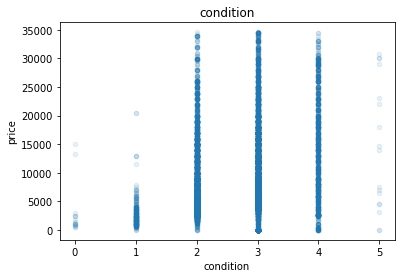

In [129]:
#Scatterplot untuk data numerik : condition

df_suv.plot(x = 'condition', y = 'price', kind = 'scatter', alpha = 0.1, ax= plt.subplot(1,1,1))
plt.title('condition')

Kondisi kendaraan SUV tidak selalu mempengaruhi harga jualnya. Nampaknya kita tidak perlu kendaraan SUV dengan kondisi baru. Selama kondisi kendaraan SUV tersebut masih baik dan layak pakai serta terlihat baru, mereka dapat dijual dengan harga yang cukup tinggi. Bahkan kendaraan dengan kondisi yang sangat parah pun masih memiliki nilai yang bisa dikatakan cukup tinggi.

**Korelasi untuk Kendaraan Jenis Sedan**

In [130]:
df_suv['price'].corr(df_suv['vehicle_age'])

-0.5763043356448248

In [131]:
df_suv['price'].corr(df_suv['odometer'])

-0.4853333515750467

In [132]:
df_suv['price'].corr(df_suv['condition'])

0.2609532782587416

Setelah melihat korelasi antara harga kendaraan jenis SUV dengan usia, jarak tempuh dan kondisinya, kita dapat menarik kesimpulan:
- usia dan jarak tempuh memiliki ketergantungan yang cukup kuat dengan harga, namun cenderung menunjukkan korelasi negatif. Semakin tinggi usia dan jarak tempuh, harganya semakin turun.
- kondisi kendaraan memiliki koneksi yang lemah, sehingga dapat dikatakan ia tidak mempengaruhi harga kendaraan.

## Kesimpulan Umum

Kita telah mempelajari kumpulan data yang berisi iklan kendaraan gratis yang ditayangkan di situs web Crankshaft List.
Penelitian ini melalui 3 tahapan, yaitu :
1. Tahap Eksplorasi Data
Kita memuat data dan mengeksplorasi data awal untuk kemudian diambil kesimpulan dan langkah-langkah yang tepat untuk mengolah datanya.
    
2. Tahap Pra-pemrosesan Data
Mengatasi nilai-nilai yang bermasalah, seperti mengisi nilai yang hilang, memperbaiki tipe data, dsb. Dari tahap ini, dapat disimpulkan:

    * Terdapat nilai yang hilang pada 5 kolom, yaitu kolom `model_year`, `cylinders`, `odometer`, `is_4wd`, dan `paint_color`, dimana kolom `is_4wd` yang merupakan kolom kondisi Boolean memiliki jumlah nilai yang hilang paling banyak di antara kolom lainnya.
    
    * Terdapat 4 kolom dengan tipe data yang tidak sesuai, yaitu kolom `model_year`, `odometer`, `is_4wd`, dan `date_posted`.
    
    * Nilai yang hilang pada kolom `model_year`, `cylinders` dan `odometer` telah diisi dengan nilai median dari pengelompokkan dengan kolom lain yang terkait, seperti `type` dan `condition`.
    
    *Nilai yang hilang pada kolom `paint_color` telah diganti dengan *unknown*.
    
    *Nilai yang hilang pada kolom `is_4wd` telah diisi dengan nilai 0, untuk kemudian nilai kolom tersebut digantikan dengan True dan False, dimana nilai 1 sama dengan True dan nilai 0 sama dengan False.
    
    * Tipe data untuk kolom `model_year`, `odometer` dan `is_4wd` yang sebelumnya berupa *float* sudah diperbaiki menjadi *integer*.
    
    * Tipe data `date_posted` yang sebelumnya berupa object sudah diperbaiki menjadi *datetime*.
    
    * Tidak ada data terduplikasi.
    
    * Kualitas data sudah diperbaiki dengan menambahkan faktor-faktor untuk lebih memudahkan analisis data, seperti penambahan kolom: `weekday`, `vehicle_age`, dan `average_mileage`. Serta memperbaiki kolom `condition` dengan mengubah nilai awal yg semula berupa string menjadi skala numerik.
    
    *Semua data bermasalah telah ditangani dan siap digunakan untuk langkah selanjutnya.
    
Setelah mendapatkan data yang sudah bersih, selanjutnya, kita mempelajari parameter inti dan menangani kemungkinan adanya *outlier*.
Pada tahap pertama, kita membuat grafik dengan 5 parameter, yaitu: 

    *Harga
    *Usia kendaraan ketika iklan ditayangkan
    *Jarak tempuh
    *Jumlah silinder
    *Kondisi
    
Harga, usia, dan jarak tempuh kendaraan menggunakan grafik histogram, sedangkan jumlah silinder dan kondisi menggunakan diagram batang.
Jumlah silinder dan kondisi yang merupakan variabel kategorik tidak mempunyai masalah maupun adanya *outlier*. Sedangkan untuk parameter harga, usia kendaraan dan jarak tempuh masing-masing memiliki banyak *outlier* pada data.

Pada tahap selanjutnya, kita mencoba menangani outlier tersebut dengan menentukan batas atas dan batas bawah *outlier* dan menyimpannya dalam DataFrame terpisah. Hasil dari DataFrame baru ini dibuat menjadi grafik kembali dan dibandingkan dengan grafik awal, dan didapatkan kesimpulan bahwa untuk ketiga parameter tersebut masih memiliki *outlier*, sehingga dapat ditarik kesimpulan adanya kondisi-kondisi luar biasa yang terjadi dalam data kita.

Setelah mempelajari dan menangani *outlier*, kita mencoba mencari masa berlaku iklan dan melihat ketergantungan antara beberapa parameter dengan jenis kendaraan. Didapatkan kesimpulan bahwa:
   * Setelah melihat ketergantungan antara jumlah iklan dengan jenis kendaraan, iklan yang paling banyak ditampilkan adalah iklan kendaraan sedan (dengan total 12009) dan SUV (dengan total 11885).
   * Setelah melihat ketergantungan antara harga dengan usia, jarak tempuh, kondisi, jenis transmisi dan warna dari kendaraan jenis sedan dan SUV, ternyata harga kedua jenis kendaraan tersebut dipengaruhi oleh usia, jarak tempuh, dan jenis transmisi. Namun yang paling berpengaruh adalah usia dan jarak tempuh.

3. Tahap Pengujian Hipotesis
Pada awal penelitian, kita memiliki hipotesis sebagai berikut:
   * Usia, jarak tempuh dan kondisi kendaraan mempengaruhi harga jual kendaraan.
   
Setelah melakukan pemrosesan data dan penelitian, ternyata hipotesis ini tidak sepenuhnya benar. Karena dilihat dari ketergantungan atau korelasi antara harga dengan parameter lainnya pada 2 jenis kendaraan paling populer, yakni sedan dan SUV, yang memiliki korelasi kuat adalah usia serta jarak tempuh. Meskipun menunjukkan korelasi negatif dimana usia dan jarak tempuh yang semakin tinggi, membuat harga kendaraan semakin menurun, namun korelasinya sangat kuat karena nilainya hampir mendekati -1. Sedangkan untuk kondisi kendaraan tidak terlalu berpengaruh terhadap harga.

